# Basic classification in TensorFlow/Keras

Based on:
https://www.tensorflow.org/tutorials/keras/basic_classification
and
https://elitedatascience.com/keras-tutorial-deep-learning-in-python

## 0. Install TensorFlow and Keras

TensorFlow is an open source machine learning framework created by Google.
Keras is a high-level API to build and train models in TensorFlow used in this tutorial.

### 0.1. Install TensorFlow and Keras with Anaconda3:

pip install tensorflow
pip install keras

### 0.2. TensorFlow and Python3 compatibility issues

(As of November, 2018) Anaconda3 is supplied with Python 3.7, unfortunately Tensorflow is not ready yet for that, and TensorFlow installation would fail.
You should downgrade to Python 3.5 and then reinstall TensorFlow+Keras:

conda install python=3.5.0

pip install tensorflow
pip install keras

## 1. Prepare the workspace and obtain+preprocess MNIST data

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense, Dropout, Convolution2D, MaxPooling2D
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)

TensorFlow version: 2.2.0
Keras version: 2.3.0-tf


MNIST dataset: 70,000 images of decimal digits (0..9) in format 28x28:
![image.png](attachment:image.png)

In [4]:
# Import MNIST dataset split into 60,000 for training and 10,000 for testing
dset = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = dset.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
type(dset)

module

In [0]:
alldata = dset.load_data()

In [7]:
type(alldata)

tuple

In [8]:
len(alldata), type(alldata[0])

(2, tuple)

In [0]:
train_images.shape

(60000, 28, 28)

In [9]:
train_images[0].shape

(28, 28)

In [10]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [11]:
type(train_images)

numpy.ndarray

In [12]:
train_images[:2]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
train_images[0].dtype

dtype('uint8')

In [0]:
2**8

256

In [0]:
2**32

4294967296

In [0]:
# How many colors can RGB with 3 bytes hold
256*256*256

16777216

In [0]:
(2**10)**3

1073741824

In [0]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [0]:
train_images[0].shape

(28, 28)

In [0]:
28**2

784

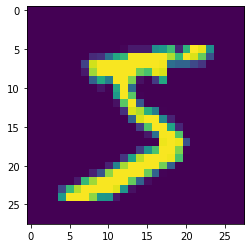

In [13]:
# Insight into imported data
num = 0
plt.imshow(train_images[num])

In [14]:
train_labels[0]

5

5
0
4
1
9


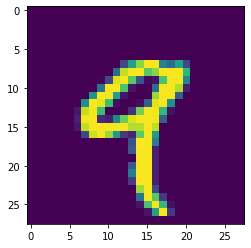

In [15]:
for n in range(5):
  plt.imshow(train_images[n])
  print(train_labels[n])

In [0]:
28*28

784

In [0]:
num

0

In [0]:
print(train_images[num])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [0]:
train_images[2][np.argmax(train_images[2], axis=1)]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254,  96,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [16]:
np.amax(train_images)

255

In [17]:
np.amin(train_images)

0

In [0]:
train_images.dtype

dtype('uint8')

In [0]:
a = np.array([126,127,128,129], dtype='uint8')
a

array([126, 127, 128, 129], dtype=uint8)

In [0]:
b = a.astype('int8')
b

array([ 126,  127, -128, -127], dtype=int8)

In [0]:
c = np.array([254,255,256,257], dtype='uint64')
c

array([254, 255, 256, 257], dtype=uint64)

In [0]:
d = c.astype('uint8')
d

array([254, 255,   0,   1], dtype=uint8)

In [0]:
e = c.astype('int8')
e

array([-2, -1,  0,  1], dtype=int8)

In [0]:
f = np.array([1,3,35,25,25,25])
f

array([ 1,  3, 35, 25, 25, 25])

In [0]:
f.dtype

dtype('int64')

In [0]:
print(train_images[num].shape)

(28, 28)


In [0]:
print(train_labels[num])

5


In [0]:
print(train_labels)

[5 0 4 ... 5 6 8]


In [0]:
np.amax(train_labels)

9

In [0]:
np.amin(train_labels)

0

In [0]:
# faster than built in set
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [0]:
set(train_labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [0]:
# Categorize labels (not mandatory for our first simple network)
train_labels_cat = np_utils.to_categorical(train_labels, 10)
test_labels_cat = np_utils.to_categorical(test_labels, 10)

In [19]:
train_labels[0]

5

In [20]:
train_labels_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
print(train_labels[num], train_labels_cat[num])

5 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
print(test_labels[0], test_labels_cat[0])

7 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [0]:
np.max(test_images)

255

In [0]:
np.min(test_images)

0

In [0]:
# Preprocess image data # we need to have data fit in floating range between 0 and 1
test_images_orig = test_images
train_images = train_images / 255
test_images = test_images / 255

In [22]:
np.max(train_images) # make sure we did it right and max is not over 1

1.0

In [23]:
np.mean(train_images)

0.1306604762738429

0


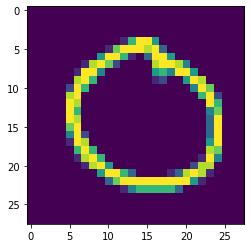

In [24]:
num = 68
print(train_labels[num])
plt.imshow(train_images[num])

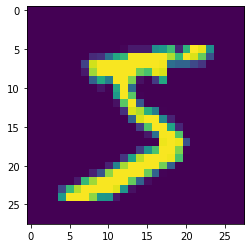

In [0]:
plt.imshow(train_images[0])

In [0]:
print(train_images[num])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

## 2. Create, train and run model

### 2.1. Create simple model

In [0]:
model = keras.Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(10, activation=tf.nn.softmax)) #how many different answers we need in the output layer
# we need 10 because we know we have 10 different digits

### 2.2. Compile model

In [0]:
model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

### 2.3. Train model

In [28]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [29]:
train_labels_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [30]:
# the training happens here
model.fit(train_images, train_labels_cat, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2641 - accuracy: 0.9244
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1182 - accuracy: 0.9643
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0799 - accuracy: 0.9764
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0600 - accuracy: 0.9811
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0472 - accuracy: 0.9855
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0366 - accuracy: 0.9888
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0305 - accuracy: 0.9908
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0237 - accuracy: 0.9925
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0207 - accuracy: 0.9934
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.015

## 3. Test model

In [31]:
test_loss, test_acc = model.evaluate(test_images, test_labels_cat)
print(test_loss,test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0849 - accuracy: 0.9779
0.08486837893724442 0.9779000282287598


In [32]:
type(model)

tensorflow.python.keras.engine.sequential.Sequential

In [33]:
# Print accuracy
print('Test accuracy:', test_acc)

Test accuracy: 0.9779000282287598


In [34]:
10000 - 9779

221

In [0]:
# Calculate prediction for test data
# here we can make our own predictions
predictions = model.predict(test_images)

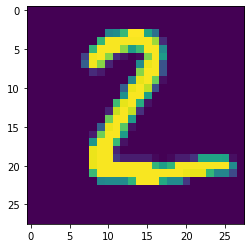

In [36]:
# Check what is predicted
num = 1
plt.imshow(test_images[num])

In [37]:
print(predictions[num])

[7.8987615e-11 5.3138072e-05 9.9994671e-01 4.1695900e-09 3.6701476e-23
 1.8577836e-07 9.6067077e-10 5.5369274e-18 5.4121593e-08 5.0763643e-16]


In [38]:
np.amax(predictions[num])

0.9999467

In [39]:
np.where(predictions[num] == np.amax(predictions[num]))

(array([2]),)

In [0]:
len(predictions)

10000

In [40]:
# gets index of the largest value
print(np.argmax(predictions[num]))

2


## 4. Visualize results

### 4.1. Define auxiliary functions

In [0]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

### 4.2. Plot prediction

In [0]:
# class names just for visualization
class_names = ['0-zero', '1-one', '2-two', '3-three', '4-four', 
               '5-five', '6-six', '7-seven', '8-eight', '9-nine']

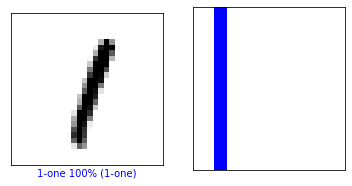

In [49]:
# visualization of prediction of one image
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images_orig)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

### 4.3. More visualization

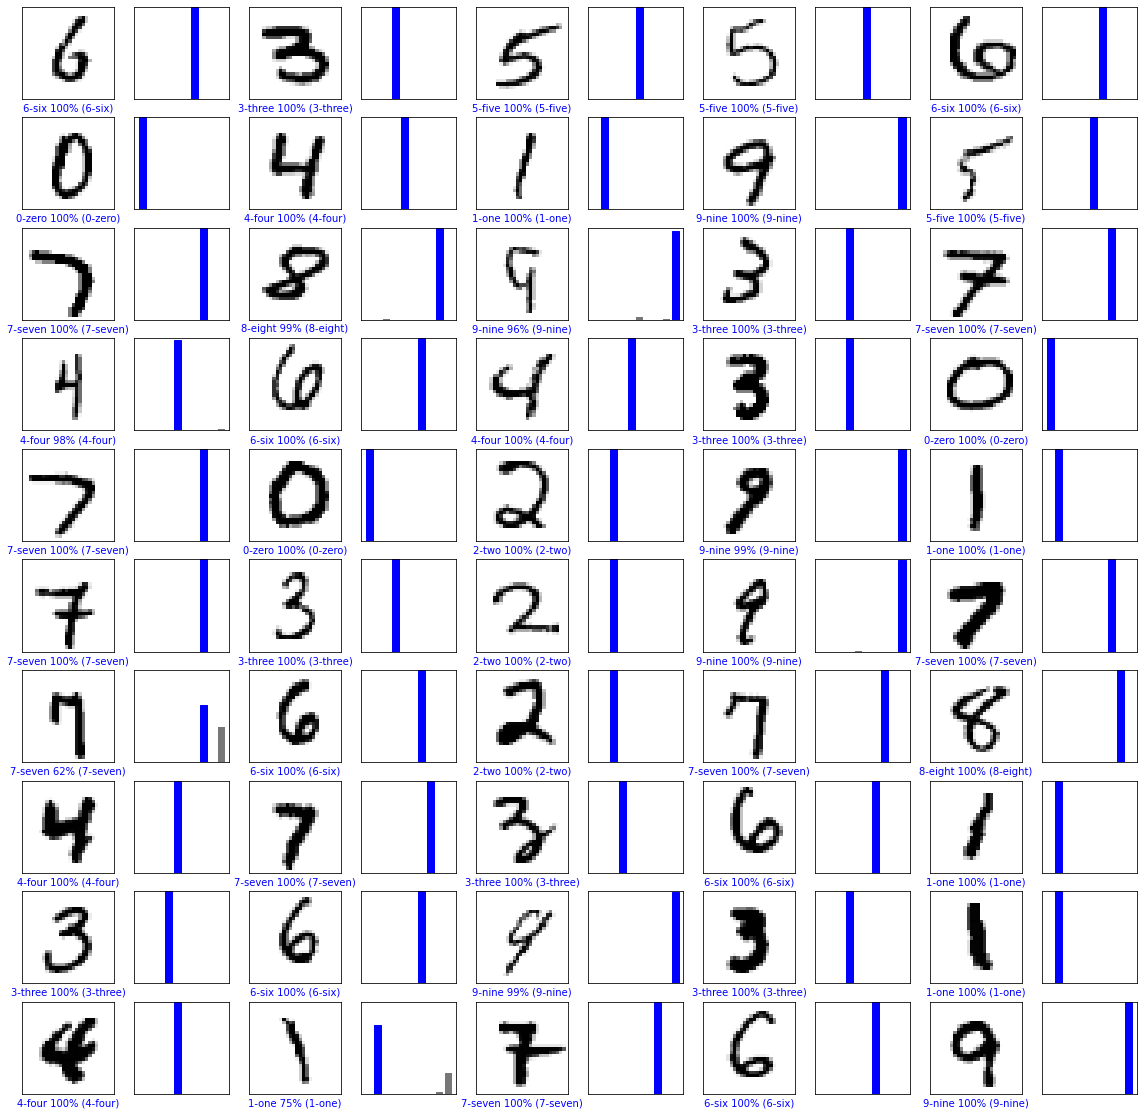

In [50]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 10
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i+50, predictions, test_labels, test_images_orig)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i+50, predictions, test_labels)

In [0]:
def plot50(offset=0):
  # Plot the first X test images, their predicted label, and the true label
  # Color correct predictions in blue, incorrect predictions in red
  num_rows = 10
  num_cols = 5
  num_images = num_rows*num_cols
  plt.figure(figsize=(2*2*num_cols, 2*num_rows))
  for i in range(num_images):
      plt.subplot(num_rows, 2*num_cols, 2*i+1)
      plot_image(i+offset, predictions, test_labels, test_images_orig)
      plt.subplot(num_rows, 2*num_cols, 2*i+2)
      plot_value_array(i+offset, predictions, test_labels)

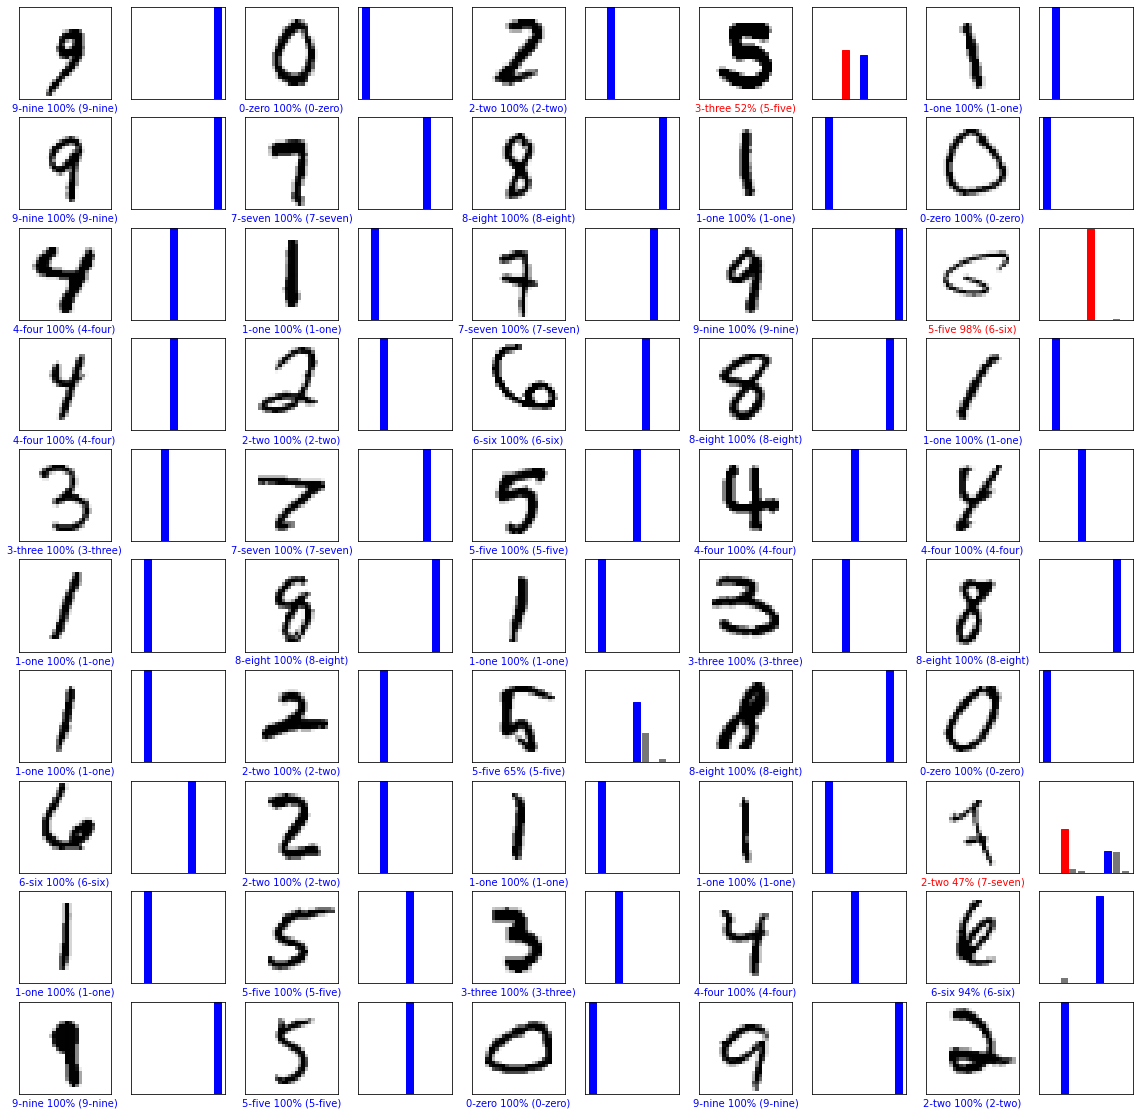

In [52]:
plot50(1000)

In [0]:
len(predictions), len(test_labels)

(10000, 10000)

In [0]:
predictions[0]

array([5.4874634e-09, 1.7241818e-10, 2.2928990e-07, 1.5958584e-03,
       3.7736744e-14, 9.5518962e-09, 5.0314239e-16, 9.9839514e-01,
       4.1882083e-07, 8.2588776e-06], dtype=float32)

In [0]:
np.argmax(predictions[0])

7

In [53]:
errors = []
for i, el in enumerate(predictions):
  if np.argmax(el) != test_labels[i]:
    errors.append(i)
len(errors)

221

In [0]:
10000-210

In [0]:
errors[:5]

[104, 247, 321, 340, 381]

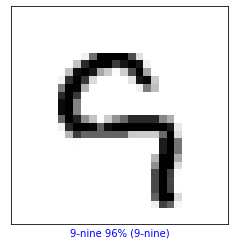

In [54]:
plot_image(104, predictions, test_labels, test_images_orig)


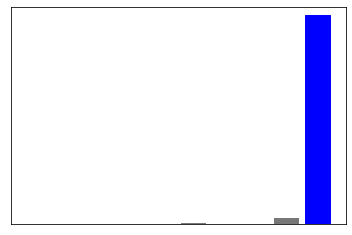

In [55]:
plot_value_array(104, predictions, test_labels)

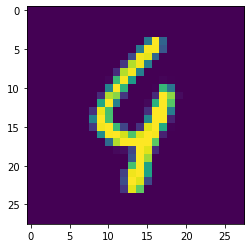

In [56]:
plt.imshow(test_images_orig[115])

## 5. Import, preprocess and train FASHION-MNIST

Fashion-MNIST is similar to MNIST but of clothings:
![image.png](attachment:image.png)

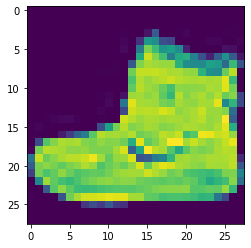

In [58]:
# Load data
dset = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = dset.load_data()
num = 0
plt.imshow(train_images[num])

In [59]:
train_labels[0]

9

In [60]:
np.max(train_labels)

9

In [0]:
len(train_images)

60000

In [61]:
np.amax(train_images)

255

In [0]:
# Preprocess data
train_labels_cat = np_utils.to_categorical(train_labels, 10)
test_labels_cat = np_utils.to_categorical(test_labels, 10)
test_images_orig = test_images
train_images = train_images / 255
test_images = test_images / 255

In [0]:
# Create and compile model
model = keras.Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(10, activation=tf.nn.softmax))
model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [64]:
# Train model and obtain predictions
model.fit(train_images, train_labels_cat, epochs=15)
test_loss, test_acc = model.evaluate(test_images, test_labels_cat)
print('Test accuracy:', test_acc)
predictions = model.predict(test_images)

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4967 - accuracy: 0.8246
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3716 - accuracy: 0.8659
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3346 - accuracy: 0.8778
Epoch 4/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3112 - accuracy: 0.8861
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2971 - accuracy: 0.8909
Epoch 6/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2800 - accuracy: 0.8966
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2689 - accuracy: 0.9008
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2570 - accuracy: 0.9051
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2475 - accuracy: 0.9089
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.238

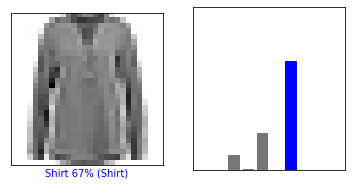

In [69]:
# Plot one prediction
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
i = 9004
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images_orig)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

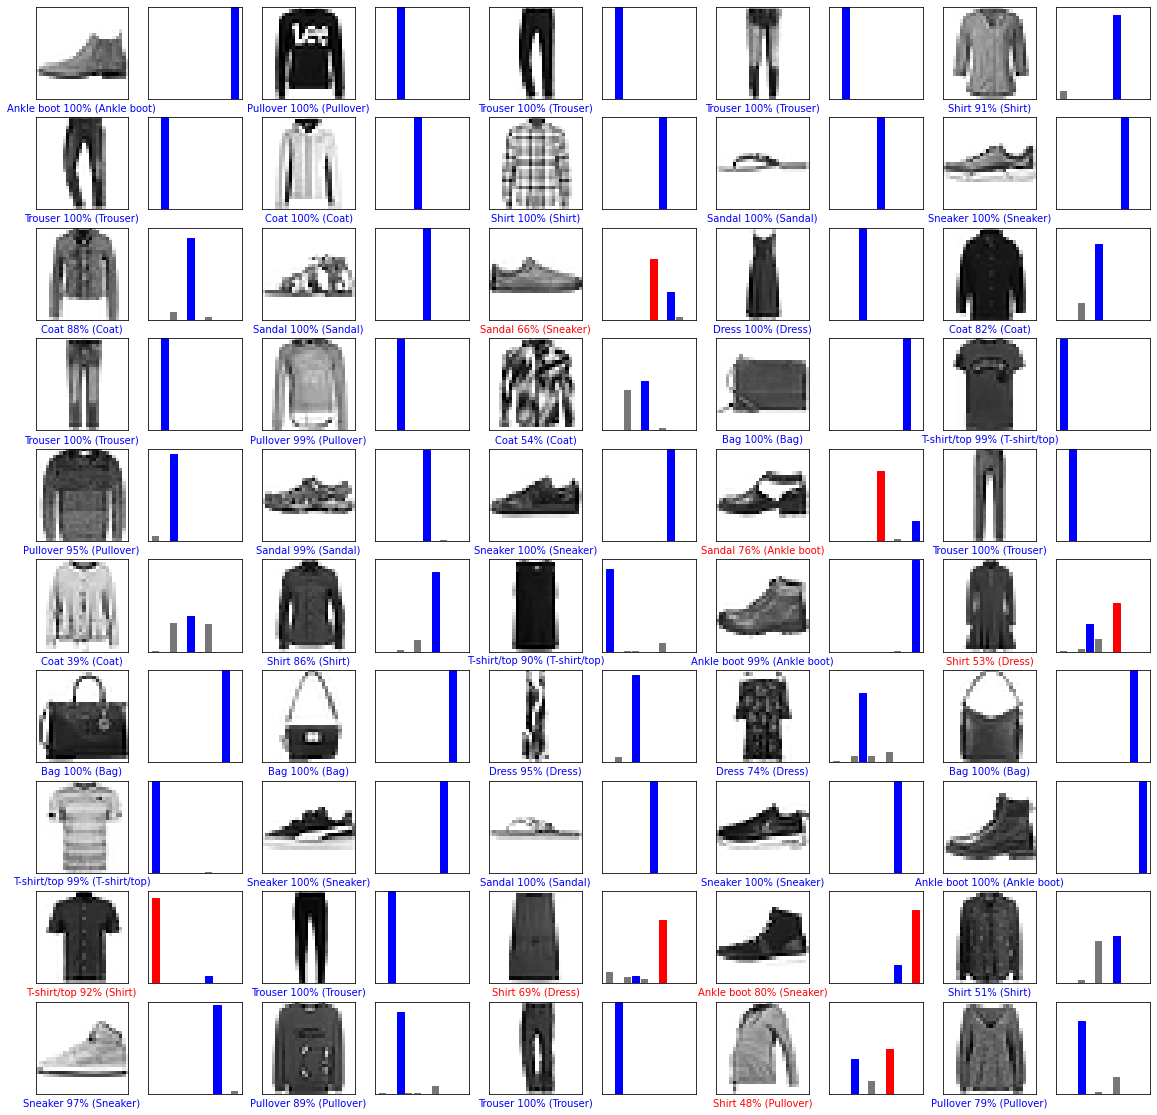

In [70]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 10
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images_orig)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)

In [0]:
def findErrors(predictions, answers):
  errors = []
  for i, el in enumerate(predictions):
    if np.argmax(el) != answers[i]:
      errors.append(i)
  return errors

In [72]:
badClothes = findErrors(predictions, test_labels)
len(badClothes)

1182

## 6. Convolutional neural network

Convolutional neural networks are better suited for image recognition

In [0]:
# Load data
dset = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = dset.load_data()
test_images_orig = test_images
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
train_labels_cat = np_utils.to_categorical(train_labels, 10)
test_labels_cat = np_utils.to_categorical(test_labels, 10)
train_images = train_images / 255
test_images = test_images / 255

In [74]:
np.max(train_images)

1.0

In [75]:
train_images.shape

(60000, 28, 28, 1)

In [0]:
train_images[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [76]:
# Create and train model, and obtain predictions
model = keras.Sequential()
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28, 1)))
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

model.fit(train_images, train_labels_cat, 
              batch_size=32, epochs=3, verbose=1)
test_loss, test_acc = model.evaluate(test_images, test_labels_cat)
print('Test accuracy:', test_acc)
predictions = model.predict(test_images)

Epoch 1/3
1875/1875 [==============================] - 105s 56ms/step - loss: 0.4881 - accuracy: 0.8250
Epoch 2/3
1875/1875 [==============================] - 104s 55ms/step - loss: 0.3322 - accuracy: 0.8803
Epoch 3/3
313/313 [==============================] - 4s 14ms/step - loss: 0.2490 - accuracy: 0.9074
Test accuracy: 0.9074000120162964


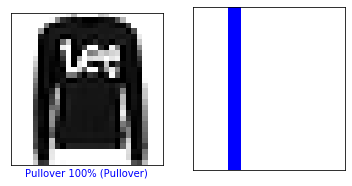

In [0]:
# Plot one prediction
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images_orig)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

In [0]:
badclothes = findErrors(predictions, test_labels)
len(badclothes)

918

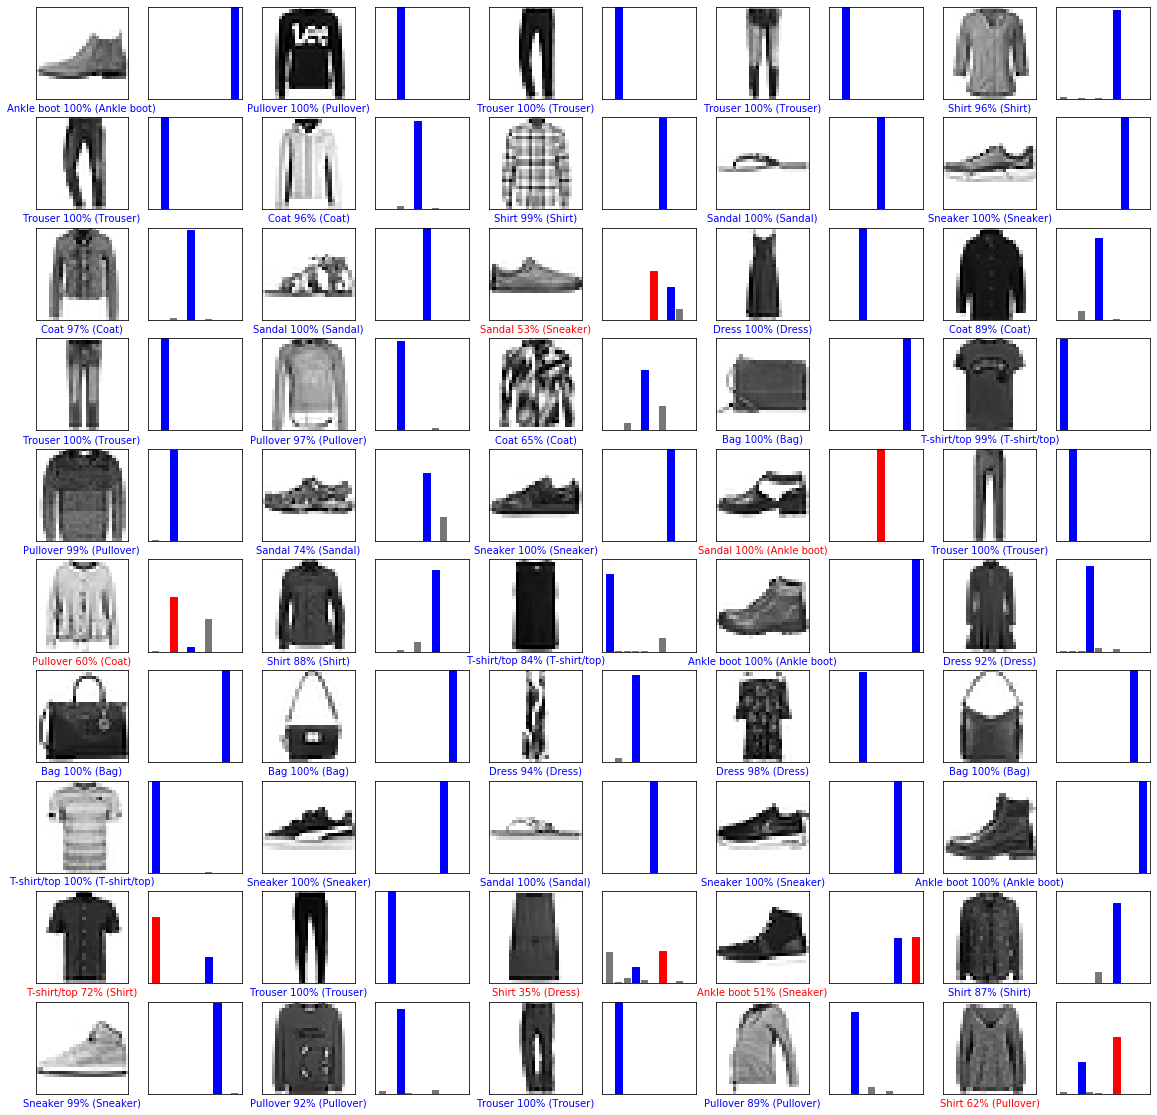

In [0]:
num_rows = 10
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images_orig)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)

In [0]:
def plotFromIndex(index):
  # Plot the first X test images, their predicted label, and the true label
  # Color correct predictions in blue, incorrect predictions in red
  num_rows = 10
  num_cols = 5
  num_images = num_rows*num_cols
  plt.figure(figsize=(2*2*num_cols, 2*num_rows))
  for i, ndx in enumerate(index):
      plt.subplot(num_rows, 2*num_cols, 2*i+1)
      plot_image(ndx, predictions, test_labels, test_images_orig)
      plt.subplot(num_rows, 2*num_cols, 2*i+2)
      plot_value_array(ndx, predictions, test_labels)

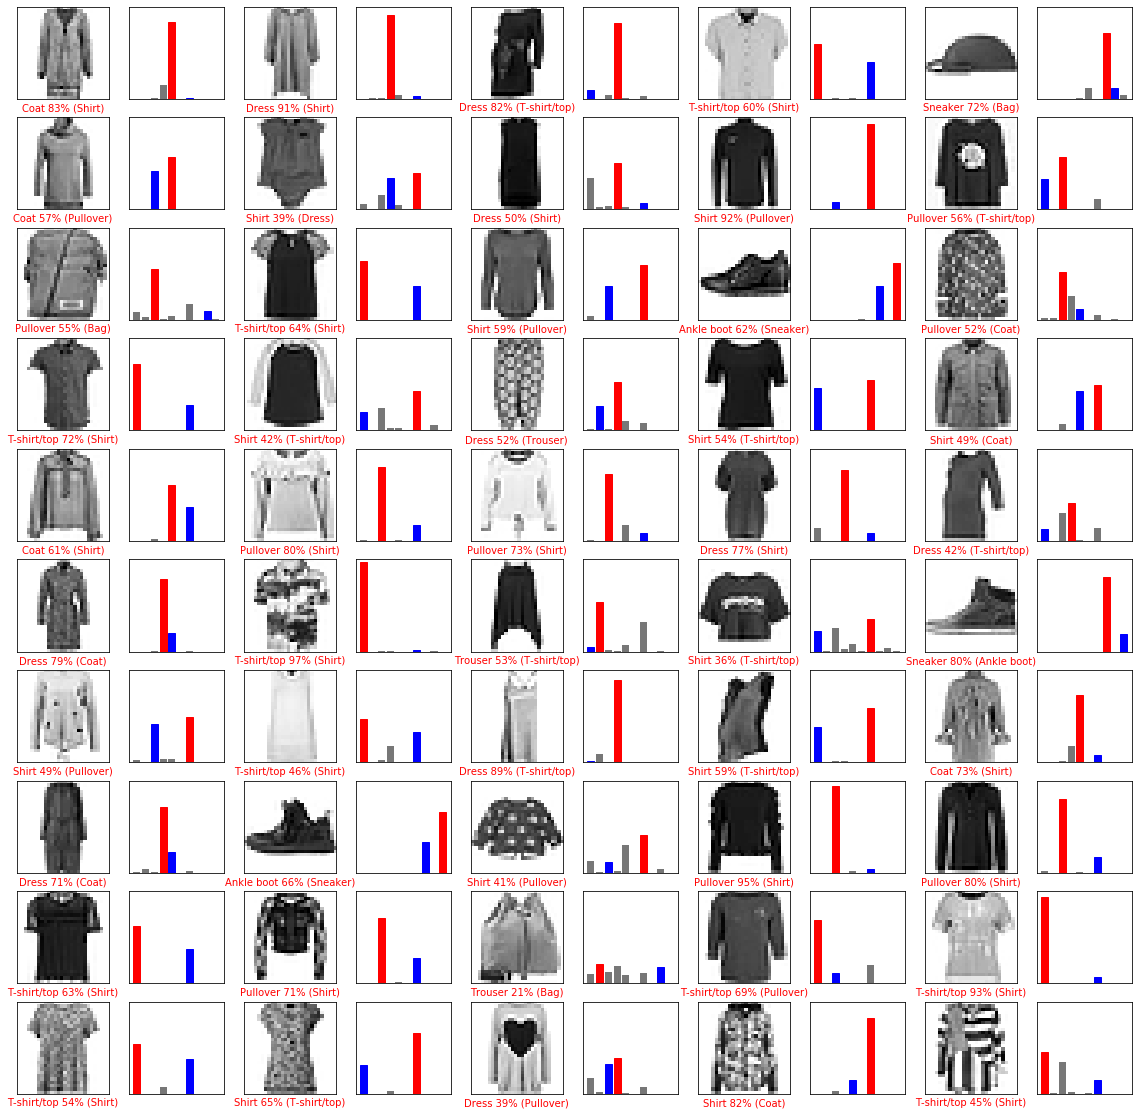

In [0]:
plotFromIndex(badclothes[-50:])